# Tải thư viện PAMI

In [1]:
!pip install -U pami==2023.8.6.8 #install the pami repository

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 835.0/835.0 kB 4.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 43.3/43.3 kB 1.7 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
  Created wheel for JsonForm: filename=JsonForm-0.0.2-py3-none-any.whl size=3314 sha256=a053feb607d1292dbfbba2abff3b1464e64d00a81a6564bb3be100e5ec679de3
  Stored in directory: /root/.cache/pip/wheels/b6/e5/87/11026246d3bd4ad67c0615682d2d6748bbd9a40ac0490882bd
  Created wheel for JsonSir: filename=JsonSir-0.0.2-py3-none-any.whl size=4752 sha256=959813b4b3427f8480f209ba3d0e60d2902b42833fe1dd4445e1e977b54c1905
  Stored in directory: /root/.cache/pip/wheels/1d/4c/d3/4d9757425983b43eb709be1043d82cd03fb863ce5f56f117e6
Successfully built JsonForm JsonSir


# Download Database

In [2]:
!wget -nc https://u-aizu.ac.jp/~udayrage/datasets/temporalDatabases/Temporal_T10I4D100K.csv #download a sample temporal database

--2024-07-20 04:37:54--  https://u-aizu.ac.jp/~udayrage/datasets/temporalDatabases/Temporal_T10I4D100K.csv
Resolving u-aizu.ac.jp (u-aizu.ac.jp)... 150.95.161.176, 150.31.244.160
Connecting to u-aizu.ac.jp (u-aizu.ac.jp)|150.95.161.176|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 4606762 (4.4M) [text/csv]
Saving to: ‘Temporal_T10I4D100K.csv’

Temporal_T10I4D100K 100%[===================>]   4.39M  1.24MB/s    in 3.5s    

2024-07-20 04:37:59 (1.24 MB/s) - ‘Temporal_T10I4D100K.csv’ saved [4606762/4606762]



In [3]:
!head -2 Temporal_T10I4D100K.csv

1	25	52	164	240	274	328	368	448	538	561	630	687	730	775	825	834
2	39	120	124	205	401	581	704	814	825	834


# Sử dụng 3P_ECLAT tìm Partial Periodic Pattern

## Thông tin và vẽ đồ thị Database

In [5]:
import PAMI.extras.dbStats.temporalDatabaseStats as stats
inputFile = 'Temporal_T10I4D100K.csv'
obj = stats.temporalDatabaseStats(inputFile, '\t')
obj.run()
print(f'Tổng số Transaction : {obj.getDatabaseSize()}')
print(f'Tổng số item : {obj.getTotalNumberOfItems()}')
print(f'Độ thưa thớt của Database (Database sparsity) : {obj.getSparsity()}')
print(f'Độ dài nhỏ nhất của Transaction : {obj.getMinimumTransactionLength()}')
print(f'Độ dài trung bình của tất cả Transaction : {obj.getAverageTransactionLength()}')
print(f'Độ dài lớn nhất của Transaction : {obj.getMaximumTransactionLength()}')
print(f'Độ lệch chuẩn của độ dài của tất cả Transaction : {obj.getStandardDeviationTransactionLength()}')
print(f'Phương sai của độ dài của tất cả Transaction : {obj.getVarianceTransactionLength()}')

Tổng số Transaction : 99913
Tổng số item : 870
Độ thưa thớt của Database (Database sparsity) : 0.9883887027691103
Độ dài nhỏ nhất của Transaction : 1
Độ dài trung bình của tất cả Transaction : 10.10182859087406
Độ dài lớn nhất của Transaction : 29
Độ lệch chuẩn của độ dài của tất cả Transaction : 3.667115963877195
Phương sai của độ dài của tất cả Transaction : 13.447874088362232


Cấu trúc của Database

In [6]:
for i in range(1, 11):
    print(f'{i}: {obj.database[i]}')

1: ['25', '52', '164', '240', '274', '328', '368', '448', '538', '561', '630', '687', '730', '775', '825', '834']
2: ['39', '120', '124', '205', '401', '581', '704', '814', '825', '834']
3: ['35', '249', '674', '712', '733', '759', '854', '950']
4: ['39', '422', '449', '704', '825', '857', '895', '937', '954', '964']
5: ['15', '229', '262', '283', '294', '352', '381', '708', '738', '766', '853', '883', '966', '978']
6: ['26', '104', '143', '320', '569', '620', '798']
7: ['7', '185', '214', '350', '529', '658', '682', '782', '809', '849', '883', '947', '970', '979']
8: ['227', '390']
9: ['71', '192', '208', '272', '279', '280', '300', '333', '496', '529', '530', '597', '618', '674', '675', '720', '855', '914', '932']
10: ['183', '193', '217', '256', '276', '277', '374', '474', '483', '496', '512', '529', '626', '653', '706', '878', '939']


**Tần suất xuất hiện của Item**<br>
**Input**: Database.<br>
**Output**: Danh sách được sắp xếp tần xuất của tất cả Item.<br>
`{'item': số lần xuất hiện, ....}`<br>
`{'368': 7818, '529': 7051, '829': 6801, ...}`




In [10]:
itemFrequencies = obj.getSortedListOfItemFrequencies()
obj.save(itemFrequencies, 'itemFrequency.csv')

**Tần xuất độ dài của tất cả Transaction**<br>
**Input**: Database.<br>
**Output**: Danh sách được sắp xếp tần suất độ dài của Transaction.<br>
`{độ dài của transaction: số lần xuất hiện}`<br>
`{1: 128, 2: 545, 3: 1607, 4: 3285, 5: 4846, ...}`

In [11]:
transactionLength = obj.getTransanctionalLengthDistribution()
obj.save(transactionLength, 'transactionSize.csv')

Biểu đồ

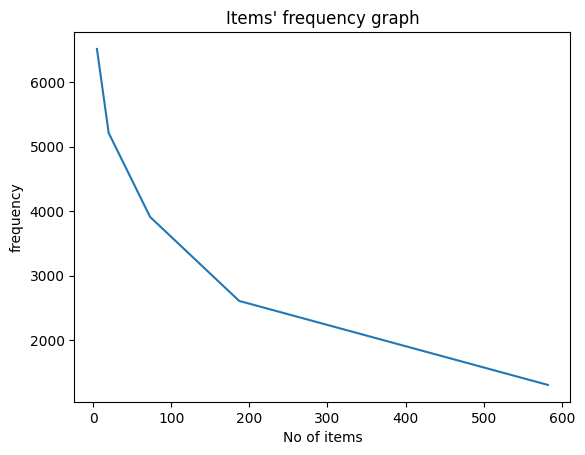

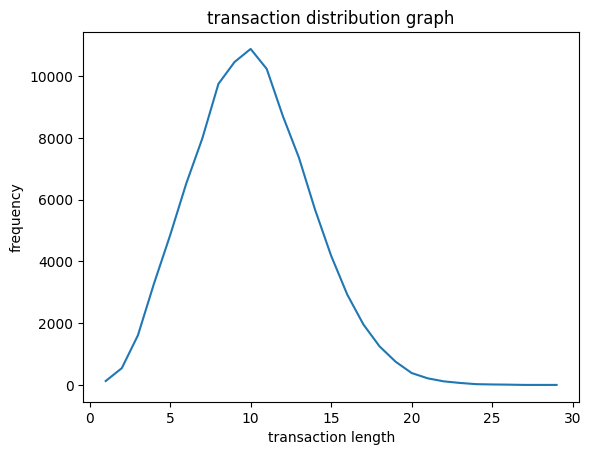

In [19]:
import PAMI.extras.graph.plotLineGraphFromDictionary as plt

# lấy tần xuất của item lớn nhất: 7818, chia làm 5 phần (0 -> 1303, 1304 -> 2606, ...)
# Mỗi phần tính số lượng obj có values nằm trong nó
# Input: database
# Output: {582: 1303, 187: 2606, 73: 3909, 20: 5212, 5: 6515}
itemFrequencies = obj.getFrequenciesInRange()
plt.plotLineGraphFromDictionary(itemFrequencies, end = 100, title = 'Items\' frequency graph', xlabel = 'No of items', ylabel= 'frequency')
plt.plotLineGraphFromDictionary(transactionLength, end = 100, title = 'transaction distribution graph', xlabel = 'transaction length', ylabel = 'frequency')

## Chọn minSup

Từ tổng số Transaction, độ thưa thớt của Database và đỉnh của đồ thị `transaction distribution graph` là 10, ta chọn minSup = 100



In [21]:
minimumSupportCount = 100
PeriodCount = 5000

## Các hàm trong thư viện PAMI

In [20]:
from PAMI.partialPeriodicPattern.basic import abstract as _ab

Các biến sử dụng

In [22]:
_startTime = float()
_endTime = float()
_oFile = " "
_memoryUSS = float()
_memoryRSS = float()
_mapSupport = {}
_itemsetCount = 0
_writer = None
_tidList = {}
_lno = 0
_Database = []

### Các hàm sử dụng

**Chuyển đổi giá trị**<br>
**Input**: database, value.<br>
**Output**: value đã được chuyển đổi.<br>

In [23]:
def convert(obj, value):
    if type(value) is int:
        value = int(value)
    if type(value) is float:
        value = (len(obj._Database) * value)
    if type(value) is str:
        if '.' in value:
            value = float(value)
            value = (len(obj._Database) * value)
        else:
            value = int(value)
    return value

**Đọc items trong database chuyển sang _Database**<br>
**Input**: database, inputFile, separator.<br>
**Output**: các giá trị items trong từng Transaction đưa vào _Database.<br>

In [31]:
def creatingItemSets(obj, iFile, sep):
    global _lno, _Database

    _Database = []

    # check iFile is DataFrame
    if isinstance(iFile, _ab._pd.DataFrame):
        data, tids = [], []
        if iFile.empty:
            print("its empty..")
        i = iFile.columns.values.tolist()
        if 'TS' in i:
            tids = iFile['TS'].tolist()
        if 'Transactions' in i:
            data = iFile['Transactions'].tolist()
        for i in range(len(data)):
            tr = [tids[i][0]]
            tr = tr + data[i]
            _Database.append(tr)
        _lno = len(_Database)

    # check iFile is String
    if isinstance(iFile, str):
        if _ab._validators.url(iFile):
            data = _ab._urlopen(iFile)
            for line in data:
                line.strip()
                _lno += 1
                line = line.decode("utf-8")
                temp = [i.rstrip() for i in line.split(sep)]
                temp = [x for x in temp if x]
                _Database.append(temp)
        else:
            try:
                with open(iFile, 'r', encoding='utf-8') as f:
                    for line in f:
                        _lno += 1
                        line.strip()
                        temp = [i.rstrip() for i in line.split(sep)]
                        temp = [x for x in temp if x]
                        _Database.append(temp)
            except IOError:
                print("File Not Found")
                quit()
    print(_Database)

**Danh sách Item có Period Support lớn hơn minPS**<br>
**Input**: database, period, minPS.<br>
**Output**: Trả về các Item có số lần xuất hiện lớn hơn minPS.<br>
`['368', '529', '829', '766', '722', '354', ...]`

In [ ]:
def creatingOneitemSets(obj, period, minPS):
    global _Database, _tidList, _mapSupport

    plist = []
    # tổng hợp các Item xuất hiện trong các Transaction
    _tidList = {} # vd: Item 25 xuất hiện trong các Transaction 1, 18, ... => {'25': [1, 18, ...], ...}
    _mapSupport = {}
    period = convert(obj, period)
    for line in _Database:
        s = line
        # số Transaction hiện tại
        n = int(s[0])
        for i in range(1, len(s)):
            # lấy Item thứ i trong Transaction n
            si = s[i]
            if _mapSupport.get(si) is None:
                _mapSupport[si] = [0, n]
                _tidList[si] = [n]
            else:
                lp = n - _mapSupport[si][1]

                # 2 Item giống nhau có khoảng các vị trí phải nhỏ hơn period.
                # _mapSupport = {'25': [1, 2], ...}, si = 25, n < period + 2 => _mapSupport = {'25': [2, n], ...}.
                # _mapSupport = {'25': [1, 2], ...}, si = 25, n = period + 3 => _mapSupport = {'25': [1, n], ...}.
                if lp <= period:
                    _mapSupport[si][0] += 1
                _mapSupport[si][1] = n
                _tidList[si].append(n) # {'25': [1, 18, ...], ...}
    minPS = convert(obj, minPS)
    # số lần xuất hiện của Item phải lớn hơn minPS
    _mapSupport = {k: v[0] for k, v in _mapSupport.items() if v[0] >= minPS}
    plist = [key for key, value in sorted(_mapSupport.items(), key=lambda x: x[1], reverse=True)]

    return plist

**Tính Period Support**<br>
**Input**: period, timeStamps.<br>
**Output**: period support.

In [ ]:
def getPeriodicSupport(period, timeStamps):
    timeStamps.sort()
    per = 0
    for i in range(len(timeStamps) - 1):
        j = i + 1
        if abs(timeStamps[j] - timeStamps[i]) <= period:
            per += 1
    return per

**Lưu các Item và PS**<br>
**Input**: database, period, minPS, prefix, suffix, tidSetX.<br>
**Output**: lưu Item và PS lớn hobw minPS vào _finalPatterns.

In [ ]:
# prefix: ['352', '527', '319', '48', '676', '720', '529', '368'], ...
# suffix: item có val >= minPS. suffix = '529', '829', ...
# tidSetX = [109, 762, 785, 2483, ...]
def save(obj, period, minPS, prefix, suffix, tidSetX):
    if prefix is None:
        prefix = suffix
    else:
        prefix = prefix + suffix
    val = getPeriodicSupport(period, tidSetX)
    if val >= minPS:
        sample = str()
        for i in prefix:
            sample = sample + i + "\t"
        obj._finalPatterns[sample] = val

**Hàm PPP_ECLAT**<br>
**Input**: database, period, minPS, prefix, itemSets, tidSetX.<br>
**Output**: Partial Periodic Pattern.

In [ ]:
# prefix: ['368'], ['529'], ...
# itemSets: tập hợp các item có val >= minPS. ['529', '829', ...]
# tidSets: tập hợp các y1 của từng itemSets. [[42, 109, ...], ...]
def Generation(obj, period, minPS, prefix, itemSets, tidSets):
    if len(itemSets) == 1:
        i = itemSets[0]
        tidi = tidSets[0]
        save(obj, period, minPS, prefix, [i], tidi)
        return
    for i in range(len(itemSets)):
        itemI = itemSets[i] # itemI = '529', '829', ...
        if itemI is None:
            continue
        tidSetX = tidSets[i] # tidSetX = [42, 109, ...], ...
        classItemSets = []
        classTidSets = []
        itemSetX = [itemI] # itemSetX = ['529'], ['829'], ...
        for j in range(i + 1, len(itemSets)):
            itemJ = itemSets[j] # itemJ = '829', ...
            tidSetJ = tidSets[j] # tidSetJ = [41, 258, 389, 451, ...], ...
            # lấy phần tử chung giữa tidSetX và tidSetJ
            y = list(set(tidSetX).intersection(tidSetJ))
            # tính tổng số các phần tử trong y (đã được sắp xếp) kế nhau có khoảng cách bé hơn period.
            val = getPeriodicSupport(period, y)
            if val >= minPS:
                classItemSets.append(itemJ)
                classTidSets.append(y)
        newprefix = list(set(itemSetX)) + prefix

        # newprefix = [...itemSetX, ...prefix]
        # classItemSets: tập hợp các item có val >= minPS. ['720', '676', '48', '319', '527', '352', '595']
        # classTidSets: tập hợp các y của từng itemSets. [[109, 762, 785, ...], ...]
        Generation(obj, period, minPS, newprefix, classItemSets, classTidSets)
        save(obj, period, minPS, prefix, list(set(itemSetX)), tidSetX)

**Hàm Mining Partial Periodic Pattern**<br>
**Input**: database, inputFile, minPS, periodm seperator.<br>

In [ ]:
def startMine(obj, iFile, minPS, period, sep):
    obj._finalPatterns = {}
    obj._startTime = _ab._time.time()
    creatingItemSets(obj, iFile, sep)
    plist = creatingOneitemSets(obj, period, minPS) # ['368', '529', '829', '766', '722', '354', '684', '217', '494', '419', ...]
    _finalPatterns = {}
    for i in range(len(plist)): # len(plist) = 797
        itemI = plist[i]
        tidSetX = _tidList[itemI]
        itemSetX = [itemI]
        itemSets = []
        tidSets = []
        for j in range(i + 1, len(plist)):
            itemJ = plist[j]
            tidSetJ = _tidList[itemJ]
            # lấy phần tử chung giữa tidSetX và tidSetJ
            y1 = list(set(tidSetX).intersection(tidSetJ))
            # tính tổng số các phần tử trong y1 (đã được sắp xếp) kế nhau có khoảng cách bé hơn period.
            val = getPeriodicSupport(period, y1)
            if val >= minPS:
                itemSets.append(itemJ)
                tidSets.append(y1)

        # itemSetX: ['368'], ['529'], ...
        # itemSets: tập hợp các item có val >= minPS. ['529', '829', ...]
        # tidSets: tập hợp các y1 của từng itemSets. [[42, 109, ...], ...]
        Generation(obj, period, minPS, itemSetX, itemSets, tidSets)
        save(obj, period, minPS, None, itemSetX, tidSetX)
    print("Partial Periodic Patterns were generated successfully using 3PEclat algorithm")
    obj._endTime = _ab._time.time()
    process = _ab._psutil.Process(_ab._os.getpid())
    obj._memoryUSS = process.memory_full_info().uss
    obj._memoryRSS = process.memory_info().rss

## Mining bằng các hàm được sử dụng trong 3P_ECLAT

In [ ]:
startMine(obj, inputFile, minimumSupportCount, PeriodCount, '\t')
print(f'Total number of Partial Periodic Patterns: {len(obj._finalPatterns)}')
print(f'Total Memory in USS: {obj._memoryUSS}')
print(f'Total ExecutionTime in ms: {obj._endTime - obj._startTime}')

Partial Periodic Patterns were generated successfully using 3PEclat algorithm
Total number of Partial Periodic Patterns: 27134
Total Memory in USS: 375103488
Total ExecutionTime in ms: 59.19603371620178


In [ ]:
#save the patterns
outFile = 'partialPeriodicFrequentPatternsAtMinSupCount100.txt'
writer = open(outFile, 'w+')
for x, y in obj._finalPatterns.items():
    s1 = x.strip() + ":" + str(y)
    writer.write("%s \n" % s1)

In [ ]:
!head 'partialPeriodicFrequentPatternsAtMinSupCount100.txt'

352	527	319	48	676	720	529	368	595:146 
527	319	48	676	720	529	368	352:148 
527	319	48	676	720	529	368	595:147 
319	48	676	720	529	368	527:149 
352	319	48	676	720	529	368	595:149 
319	48	676	720	529	368	352:151 
319	48	676	720	529	368	595:150 
48	676	720	529	368	319:152 
352	527	48	676	720	529	368	595:148 
527	48	676	720	529	368	352:150 


# Sử dụng 3P-ECLAT trong thư viện PAMI với các giá trị minSup khác nhau trên cùng một Database

In [ ]:
#Import the libraries
from PAMI.partialPeriodicPattern.basic import PPP_ECLAT  as alg #import the algorithm
import pandas as pd

#Specify the input parameters
inputFile = 'Temporal_T10I4D100K.csv'
seperator='\t'
PeriodCount = 5000
minimumSupportCountList = [100, 150, 200, 250, 300]
#minimumSupport can also specified between 0 to 1. E.g., minSupList = [0.005, 0.006, 0.007, 0.008, 0.009]

In [ ]:
result = pd.DataFrame(columns=['algorithm', 'minSup', 'PeriodCount', 'patterns', 'runtime', 'memory'])
#initialize a data frame to store the results of PPP_ECLAT algorithm

In [ ]:
print(f'minimumSupportCountList: {minimumSupportCountList}')

minimumSupportCountList: [100, 150, 200, 250, 300]


In [ ]:
for minSupCount in minimumSupportCountList:
    # obj = alg.PPP_ECLAT(iFile=inputFile, minPS=minSupCount, period=PeriodCount, sep=seperator)

    startMine(obj, inputFile, minSupCount, PeriodCount, seperator)
    #store the results in the data frame
    result.loc[result.shape[0]] = ['3P_ECLAT', minSupCount, PeriodCount, len(obj._finalPatterns), obj._endTime - obj._startTime, obj._memoryRSS]

Partial Periodic Patterns were generated successfully using 3PEclat algorithm
Partial Periodic Patterns were generated successfully using 3PEclat algorithm
Partial Periodic Patterns were generated successfully using 3PEclat algorithm
Partial Periodic Patterns were generated successfully using 3PEclat algorithm
Partial Periodic Patterns were generated successfully using 3PEclat algorithm


In [ ]:
print(result)

  algorithm  minSup  PeriodCount  patterns    runtime     memory
0  3P_ECLAT     100         5000     27134  60.566884  397729792
1  3P_ECLAT     150         5000     18967  52.165507  397799424
2  3P_ECLAT     200         5000     13131  48.679899  397680640
3  3P_ECLAT     250         5000      7604  45.761060  397467648
4  3P_ECLAT     300         5000      4482  41.938863  397860864


<Axes: xlabel='minSup'>

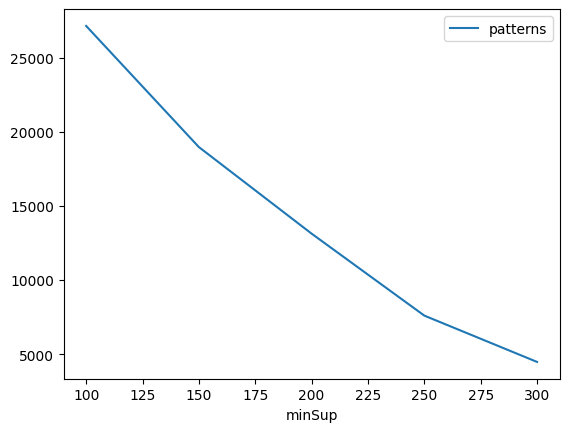

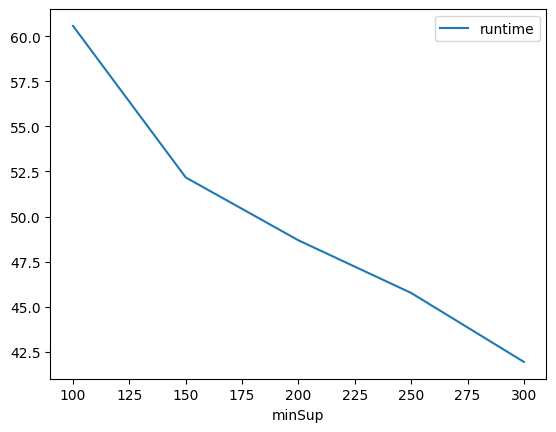

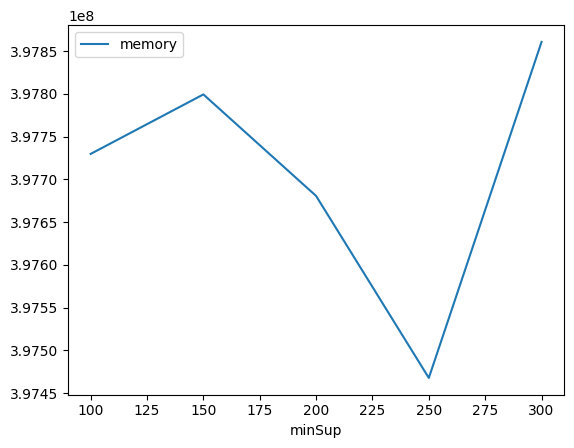

In [ ]:
result.plot(x='minSup', y='patterns', kind='line')
result.plot(x='minSup', y='runtime', kind='line')
result.plot(x='minSup', y='memory', kind='line')

#Graphs can be improved further by using additional packages, such as plotly and matplotlib